In [9]:
import numpy as np
import pandas as pd
matches=pd.read_csv('matches.csv')
matches.info()
matches[pd.isnull(matches['winner'])]
matches['winner'].fillna('Draw', inplace=True)
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)
matches[pd.isnull(matches['city'])]
matches['city'].fillna('Dubai',inplace=True)
matches.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 59.7+ KB


,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,5.540881,5.511006,5.371069,0.025157,5.309748,13.682390,3.372642,NaN
std,183.741666,2.773026,3.329169,3.341677,3.293140,0.156726,3.288726,23.908877,3.420338,NaN
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,9.000000,8.000000,7.250000,0.000000,8.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,13.000000,13.000000,13.000000,1.000000,14.000000,146.000000,10.000000,NaN


1
MI
No of toss winners by each team
MI -> 85
KKR -> 78
DD -> 72
RCB -> 70
KXIP -> 68
CSK -> 66
RR -> 63
DC -> 43
SRH -> 35
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 92
CSK -> 79
KKR -> 77
RCB -> 73
KXIP -> 70
RR -> 63
DD -> 62
SRH -> 42
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


[]

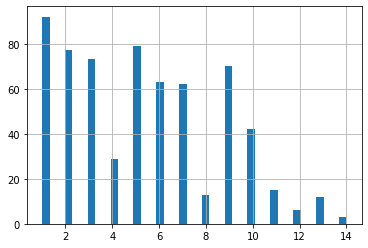

In [10]:
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)])
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)
df = pd.DataFrame(matches)
df.describe()
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
df['winner'].hist(bins=40).plot()

Text(0.5, 1.0, 'Match winners')

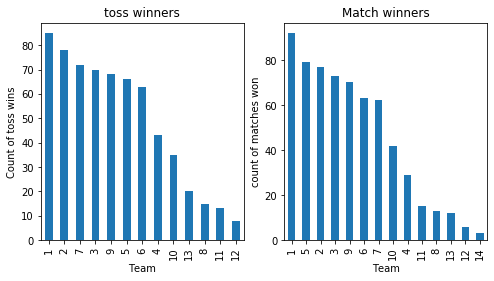

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [12]:
df.apply(lambda x: sum(x.isnull()),axis=0) #Checks for null values in the rows


team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [13]:
df[pd.isnull(df['city'])] #Checks for null values in the columns

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [14]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

team1            int64
team2            int64
city             int32
toss_decision    int32
toss_winner      int64
venue            int32
winner           int64
dtype: object

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  model.fit(data[predictors],data[outcome])

from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)
df.head(3)


Accuracy : 23.270%


c:\users\ateen\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ateen\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\ateen\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\ateen\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a sol

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,14,1,3,23,10
1,1,11,25,1,11,16,11
2,8,2,27,1,2,25,2


In [16]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)
df.head(7)

c:\users\ateen\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy : 89.151%


c:\users\ateen\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,14,1,3,23,10
1,1,11,25,1,11,16,11
2,8,2,27,1,2,25,2
3,11,9,15,1,9,11,9
4,3,7,2,0,3,14,3
5,8,10,14,1,10,23,10
6,2,1,22,1,1,34,1


In [21]:
team1='KKR'
team2='DD'
toss_winner='KKR'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print("Possible winner : "+list(dicVal.keys())[list(dicVal.values()).index(output)])
#prediction algorithm in pthon 

Possible winner : KKR


In [20]:
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input)
#possibility of team winning

team2            0.255817
team1            0.224163
venue            0.170013
toss_winner      0.166514
city             0.148915
toss_decision    0.034577
dtype: float64


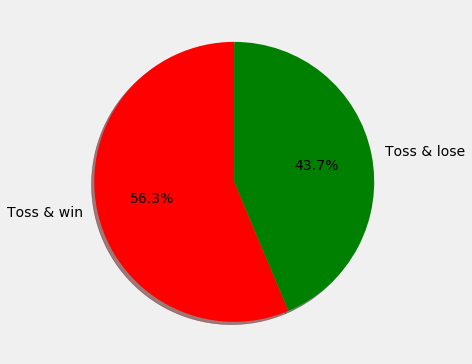

In [22]:
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(577-len(df_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
#56% team toos jiti match jiti

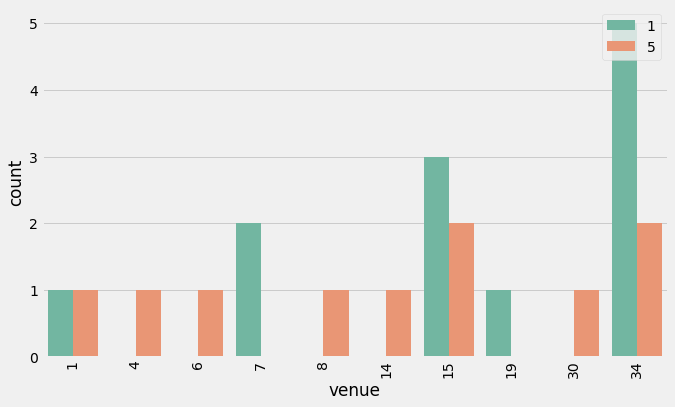

In [22]:
import seaborn as sns
team1=dicVal['MI']
team2=dicVal['CSK']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set2')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()
#venue mei kon kon jita hai jaise 4 = csk jiti mi nhi

In [23]:
le.classes_[14]  #type the match number

'M Chinnaswamy Stadium'